<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/CV-2025/blob/main/Week_06/Lab_06_Depth_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 5. Depth Estimation.

**Depth estimation** is a computer vision task designed to estimate depth from a 2D image. Depth information is important for autonomous systems to perceive environments and estimate their own state. The depth image includes information about the distance of the objects in the image from the viewpoint, which is usually the camera taking the image. Let's recall the basics how to get a depth map depth **stereo images**.

![](https://docs.opencv.org/3.4/stereo_depth.jpg)

The above equation says that the depth of a point in a scene is inversely proportional to the difference in distance of corresponding image points and their camera centers.  x and x′ are the distance between points in image plane corresponding to the scene point 3D and their camera center. B is the distance between two cameras (which we know) and f is the focal length of camera (already known). So in short, the above equation says that the depth of a point in a scene is inversely proportional to the difference in distance of corresponding image points and their camera centers. So with this information, we can derive the depth of all pixels in an image.

OpenCV2 provides some bunch of methods to generate a map of depth. All we need two images (where it comes stereo images).

In [ ]:
!gdown 1sVwgOdt8sQCHyuUGaBW5EYF3c0cavVWm
!gdown 1VfjJEL7W2xwyzlXT3x1zkYWF6q3GkTpU

Downloading...
From: https://drive.google.com/uc?id=1sVwgOdt8sQCHyuUGaBW5EYF3c0cavVWm
To: /content/right.png
100% 266k/266k [00:00<00:00, 71.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VfjJEL7W2xwyzlXT3x1zkYWF6q3GkTpU
To: /content/left.png
100% 258k/258k [00:00<00:00, 66.7MB/s]


In [ ]:
import cv2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import time

In [ ]:
left_image = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
left_image.shape

(480, 638)

In [ ]:
right_image.shape

(479, 638)

The main problem is that images should be the same size...

In [ ]:
right_image = cv2.resize(right_image, (638, 480))

In [ ]:
stereo = cv2.StereoBM_create(numDisparities=0, blockSize=55)
depth = stereo.compute(left_image, right_image)

(-0.5, 637.5, 479.5, -0.5)

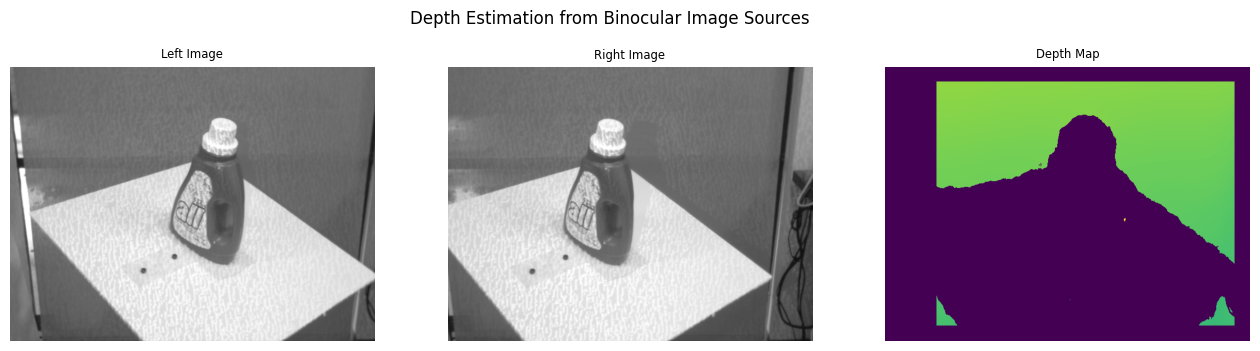

In [ ]:
plt.figure(figsize=(16, 4))
plt.suptitle('Depth Estimation from Binocular Image Sources')

ax = plt.subplot(1, 3, 1)
img_title = 'Left Image'
image = plt.imread('left.png')
plt.imshow(image, cmap=plt.cm.binary)
plt.title(img_title, fontsize='small')
plt.axis(False)

ax = plt.subplot(1, 3, 2)
img_title = 'Right Image'
image = plt.imread('right.png')
plt.imshow(image, cmap=plt.cm.binary)
plt.title(img_title, fontsize='small')
plt.axis(False)

ax = plt.subplot(1, 3, 3)
img_title = 'Depth Map'
plt.imshow(depth)
plt.title(img_title, fontsize='small')
plt.axis(False)

Does it seem to be useful?

You can [read](https://learnopencv.com/depth-perception-using-stereo-camera-python-c/) additionally how it basically works.

And how to deal with [stereo camera](https://learnopencv.com/depth-perception-using-stereo-camera-python-c/).

Ok, now let's switch to more prevalent type of depth map estimations, which Monocular Depth Estimation. Today this is usually associated with DPT, DINO and Depth Anything models.

 ## Image Depth Estimation with DPT/DINO/Depth Anything

Big progress has become possible after inventing **DPT (Dense Prediction Transformer)**, which is a novel architecture that estimates depth from a single image. It uses an encoder-decoder approach, where the encoder is based on the Vision Transformer (ViT), a significant advancement in computer vision. The encoder, also called the network's backbone, is pre-trained on a large corpus such as ImageNet.

**Here's how it works:** ViT uniquely processes the image, maintaining the same level of detail throughout and having a wide field of view. This helps DPT make detailed and globally consistent predictions. Instead of traditional methods that lose some detail through downsampling, DPT keeps the image quality high at all stages. The key to DPT's success is its ability to produce finer and more coherent predictions than traditional convolutional networks, making it a significant advancement in computer vision.

![](https://blog.paperspace.com/content/images/size/w1600/2024/07/Screenshot-2024-07-24-at-7.09.52-PM.png)

The **DINOv2** model uses a discriminative, self-supervised method with a series of improvements to the initial DINO model. Its network architecture combines DINO and iBOT losses with the centering of SwAV (or Swapping Assignments Between Views). The researchers introduced a bag of tricks on this connected network that focused on accelerating and stabilizing the training at scale. It also enables the learning of features about the image at the image and patch levels. DINO and iBOT are both self-distilation models that use student-teacher architecture. However, their objectives differ. DINO provides an image-level objective since it uses the image features for training, while iBOT provides a patch-level objective since it uses the patch features of images for training.

In **DINOv2**, the researchers executed a principal component analysis (PCA) computation on the iBOT (Image BERT Pretraining with Online Tokenizer) network patches. This PCA adds another level for feature extraction. It results in a segmented representation of the image features in different colors, creating an implicit understanding of distinct features. Images of the same class will always generate the same color segment across the same features.

**MIDAS** (Monocular Depth Estimation via a Multi-Scale Network) advanced the field by training a neural network to estimate depth from single images. It achieved this by leveraging diverse datasets, each contributing unique types of depth information. Various datasets containing depth information are not compatible in terms of scale and bias. This is due to the diversity of measuring tools, including stereo cameras, laser scanners, and light sensors. Midas introduces **a new loss function** that absorbs these diversities, thereby eliminating compatibility issues and allowing multiple data sets to be used for training simultaneously. The MIDAS network was trained on these datasets to enhance its generalization ability across different scenes and conditions. By combining various sources of depth data, MIDAS learned to predict depth from a single image more accurately.


The most advanced specifically for MDE can be considered  **Depth Anything** model. The journey towards developing Depth Anything began with a critical analysis of other depth estimation methods, emphasizing the limitations related to data coverage. The model’s success focused on the potential of unlabeled datasets, and the authors took an unconventional route to achieve this. Two effective strategies were used: creating a more challenging optimization target through data augmentation and developing auxiliary supervision to inherit rich semantic priors from pre-trained encoders. The models are evaluated on zero-shot capabilities using six public datasets and random photos, demonstrating impressive generalization.

## Monocular Depth Estimation with DINOv2

We are starting with DinoV2 that base its principle on something called contrastive learning. One of part to distinguish important information from background is applying Principal Component Analysis.

Let's visualize the patch-level encodings from DINOv2. By this we can show up what DINOv2 has learned using several related images with PCA demosntrating the relationship between the image set encodings. It could be more useful visualization if we find images with separable foreground and background.

In [ ]:
# Importing libraries...

import torch
import urllib
from PIL import Image
import sklearn
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from torchvision import transforms as T

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

Uploading images...

In [ ]:
url_list = ["https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Common_Kingfisher_Alcedo_atthis.jpg/640px-Common_Kingfisher_Alcedo_atthis.jpg",
            "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Dhole%28Asiatic_wild_dog%29.jpg/640px-Dhole%28Asiatic_wild_dog%29.jpg",
            "https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Male_Bolognese_Dog_Walking.jpg/640px-Male_Bolognese_Dog_Walking.jpg",
            "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Greenland_467_%2835130903436%29_%28cropped%29.jpg/640px-Greenland_467_%2835130903436%29_%28cropped%29.jpg"]

file_list = []

for val, url in enumerate(url_list):
  filename = f"animal_{val}.jpg"
  file_list.append(filename)
  urllib.request.urlretrieve(url, filename)

Take a look on images...

In [ ]:
fig, axs = plt.subplots(1, len(file_list))

for i in range(len(file_list)):
  axs[i].imshow(Image.open(file_list[i]))
  axs[i].axis('off')  # Turn off axis labels

plt.show()

Next let's arrange all necessary transformations and model downloading...

In [ ]:
transform = T.Compose([
            T.Resize(560, interpolation=T.InterpolationMode.BICUBIC),
            T.CenterCrop(560),
            T.ToTensor(),
            T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),])

batch_size = len(file_list)
imgs_tensor = torch.zeros(batch_size, 3, 560, 560)

for i in range(batch_size):
    img = Image.open(file_list[i])
    imgs_tensor[i] = transform(img)

#load large DinoV2 model
dino = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
dino.to(DEVICE)

#inference
with torch.no_grad():
  features_dict = dino.forward_features(imgs_tensor.to(DEVICE))
  features = features_dict['x_norm_patchtokens']

print("before reshape", features.shape)
_, n_patch, dim = features.shape
features = features.reshape(batch_size*n_patch, dim)
print("after reshape", features.shape)

We want to separate background from objects on the image using PCA.

In [ ]:
features = features.to(DEVICE)
pca = PCA(n_components=1)
scaler = MinMaxScaler()
pca.fit(features)
pca_features = pca.transform(features)
norm_features = scaler.fit_transform(pca_features)

#threshold background
threshold = 0.5 #adjust the threshold based on your images
background = norm_features > threshold

#set background of features to zero
bg_features = features.clone() #make a copy of features
for i in range(bg_features.shape[-1]):
  bg_features[:,i][background[:,0]] = 0

Let's view normalized features after transformations.

In [ ]:
fig, axs = plt.subplots(1, batch_size)

for i in range(batch_size):
  img = pca_features[i * n_patch: (i+1) * n_patch, 0].reshape(40, 40)
  axs[i].imshow(img)
  axs[i].axis('off')  # Turn off axis labels

plt.show()


And remove background by adjusting threshold based on our images...

In [ ]:
threshold = 0.5 #for ViTl/14
background = norm_features > threshold #

fig, axs = plt.subplots(1, batch_size)

for i in range(batch_size):
  img = norm_features[i * n_patch: (i+1) * n_patch]
  #mask = background[i * n_patch: (i+1) * n_patch]
  img[img>threshold] = 0
  axs[i].imshow(img.reshape(40, 40))
  axs[i].axis('off')  # Turn off axis labels

plt.show()

What if we take higher number of components? Potentially we can combine pixels on image that have something in common...

In [ ]:
bg_features = features.clone() #make a copy of features
for i in range(bg_features.shape[-1]):
  bg_features[:,i][background[:,0]] = 0

pca3 = PCA(n_components=3)
pca3.fit(bg_features)
features_foreground = pca3.transform(bg_features)
norm_features_foreground = scaler.fit_transform(features_foreground)

fig, axs = plt.subplots(1, batch_size)

for i in range(batch_size):
  img = norm_features_foreground[i * n_patch: (i+1) * n_patch]
  mask = background[i * n_patch: (i+1) * n_patch]
  for j in range(3):
    img[:,j][mask[:,0]]=0
  axs[i].imshow(img.reshape(40, 40,3))
  axs[i].axis('off')  # Turn off axis labels

plt.show()

## Monocular Depth Estimation with MiDAS (Monocular Depth Estimation via a Multi-Scale Network)

### Monocular Depth Estimation for videos

Despite we will go through procesing video techniques on next lab sessions, we cannot ignore applications of depth map estimations for video streams and files, as working with dynamical context is vital today for different MDE techniques.

In [ ]:
import os
import cv2
import torch
import numpy as np

Uploading a video...

In [ ]:
!gdown 1OE-QLmPGVdK_gJizq95mQ41IC8H0MwET

Get a MiDaS model for MDE. To save our time let's take a small one, but you are able to experiment with different type of architecture.

In [ ]:

model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)
# model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

midas.to(DEVICE)
midas.eval()

# # Load transforms to resize and normalize the image
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

In [ ]:
filename = 'horse.mp4'
margin_width = 50

raw_video = cv2.VideoCapture(filename)
frame_width, frame_height = int(raw_video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(raw_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(raw_video.get(cv2.CAP_PROP_FPS))
output_width = frame_width * 2 + margin_width

filename = os.path.basename(filename)
output_path = os.path.join('_video_depth_result_.mp4')
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*"mp4v"), frame_rate, (output_width, frame_height))

while raw_video.isOpened():
    ret, raw_frame = raw_video.read()
    if not ret:
        break

    pre_frame = cv2.cvtColor(raw_frame, cv2.COLOR_BGR2RGB)
    frame = transform(pre_frame).to(DEVICE)

    with torch.no_grad():
        prediction = midas(frame)

        prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=pre_frame.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

    depth_map = prediction.cpu().numpy()

    depth_map = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    depth_map = (depth_map*255).astype(np.uint8)
    depth_map = cv2.applyColorMap(depth_map , cv2.COLORMAP_MAGMA)

    split_region = np.ones((frame_height, margin_width, 3), dtype=np.uint8)

    combined_frame = cv2.hconcat([raw_frame, split_region, depth_map])

    out.write(combined_frame)

raw_video.release()
out.release()

### MDE with web camera

We can also apply our model for such tasks as processing video stream. However this time it is a bit tricky of how to arrange camera input correctly...

First let's import all necessary libraries and copy a code of our model to transform and process frames for MDE.

In [ ]:
import PIL
import io
import cv2
import torch
import time
import numpy as np
from base64 import b64decode, b64encode
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from IPython.display import display, Javascript

model_type = "MiDaS_small"

midas = torch.hub.load("intel-isl/MiDaS", model_type)
midas.to(DEVICE)
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

This time we need help of JavaScript to properly create our live video stream using our webcam as an input. Additionally we need a helper function to decode image from js format.

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

Ok, let's start streaming video from webcam and make MDE for each frame.

In [ ]:
video_stream()
# label for video
label_html = 'Capturing...'
# # initialze bounding box to empty

bbox = ''
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # grayscale image for face detection
    start = time.time()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    input_batch = transform(img).to(DEVICE)

    # Prediction and resize to original resolution
    with torch.no_grad():
        prediction = midas(input_batch)

        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    depth_map = prediction.cpu().numpy()
    depth_map = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    depth_map = (depth_map*255).astype(np.uint8)
    depth_map = cv2.applyColorMap(depth_map , cv2.COLORMAP_MAGMA)
    cv2_imshow(depth_map)

This might be seen a bit inconvenient, as we get output in the form of frame-by-frame. Any suggestions how to make it better?

## Application with FlyOne to work with depth maps


In [ ]:
!pip install fiftyone
clear_output()

In [ ]:
from glob import glob
import numpy as np
from PIL import Image
import torch

import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.brain as fob
from fiftyone import ViewField as F

In [ ]:
!curl -o sunrgbd.zip https://rgbd.cs.princeton.edu/data/SUNRGBD.zip

In [ ]:
!unzip sunrgbd.zip
clear_output()

In [ ]:
dataset = fo.Dataset(name="SUNRGBD-20", persistent=True)

In [ ]:
## restrict to 20 scenes

scene_dirs = glob("SUNRGBD/k*/*/*")[:20]

In [ ]:
samples = []
for scene_dir in scene_dirs:
    ## Get image file path from scene directory
    image_path = glob(f"{scene_dir}/image/*")[0]

    ## Get depth map file path from scene directory
    depth_path = glob(f"{scene_dir}/depth_bfx/*")[0]

    depth_map = np.array(Image.open(depth_path))
    depth_map = (depth_map * 255 / np.max(depth_map)).astype("uint8")
    sample = fo.Sample(
        filepath=image_path,
        gt_depth=fo.Heatmap(map=depth_map),
    )

    samples.append(sample)

dataset.add_samples(samples);

In [ ]:
session = fo.launch_app(dataset, auto=False)

In [ ]:
# Wait couple seconds...

session.show()

Hm, for some reason depth maps were not shown...

That's it for today...

---

# Home task

This time you have to choose between these **THREE** tasks. Each of them is worth 2 points.

### 1. **Train your own model for a depth map image transformation (2 points)**

There are some examples how to implement it:



1.   https://www.kaggle.com/code/shreydan/monocular-depth-estimation-nyuv2
2.   https://www.kaggle.com/code/bmanikan/depth-estimation - BUT: tensorflow realization

Requirements:

1. You have to create a step-by-step working notebook for training a model for depth map estimation
2. Relization should be based on pytorch
3. You are allowed to retrain pretrained models with pytorch background solution
4. Code shouldn't be copy-pasted, but can be based on some source. In that case provide a link of your code source.
5. Number of training epochs is not important

**Result:** a separate Jupyter Notebook uploaded to the Moodle. It should contain train and prediction stages accordingly.




In [ ]:
# **YOUR CODE**

### 2. **Camera output improvement**

You might notice that the current solution from the lab seems to be a bit clunky due to frame-by-frame prediction as an output. You are asked to make it more usable in a sense that an output should be continous, i.e. as a video stream.

Requirements:

1. Your solution should work in colab.
2. You are allowed to use any model for MDE
2. It is allowed to provide adepth map prediction output in a separate pop-up window. As an example:

<img src="https://drive.google.com/uc?export=view&id=1uXKSF-zKHv8NVSbPHEgSBQnJVnjGoCKy" alt="Drawing" width="600"/>

**Result:** a separate Jupyter Notebook with a working code.

### **Make an app with MDE functionality**
As the name suggests you can make an application that transforms image/video/etc. into depth map(-s).

Requirements:

1. This should be a completely working app based on Flask/Docker/Streamlit/etc, but it should have a trivial deployment wrapper.
2. It is up to you how you define app's functionality and its API.

**Result:** You can upload a link (e.g. Github) for downloading all necessary artifacts to the Moddle. DON'T forget to provide instructions (README.md or something else) how to deploy and using it for the task.

In [ ]:
# **YOUR CODE**